In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Files to load
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

#read csv
mouse_df = pd.read_csv(mouse_file)
clinical_df = pd.read_csv(clinical_file)

#merge data frames
treatmeant_df = pd.merge(clinical_df, mouse_df, on="Mouse ID")

#preview df
treatmeant_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = treatmeant_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
tumor_volume = grouped_df.mean()
# Convert to DataFrame
tumor_volume_df = pd.DataFrame(tumor_volume).reset_index()
# Preview DataFrame
tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stderr = grouped_df.sem()
# Convert to DataFrame
tumor_stderr_df = pd.DataFrame(tumor_stderr).reset_index()
# Preview DataFrame
tumor_stderr_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_volume = tumor_volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_tumor_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


No handles with labels found to put in legend.


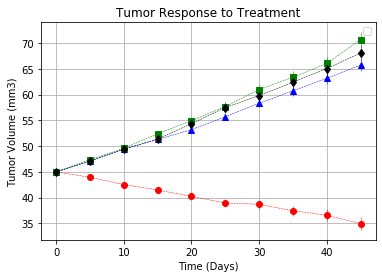

In [19]:
# Generate the Plot (with Error Bars)
drug_format = (("Ramicane","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black"))
for drug,marker,colors in drug_format:
    stderr = tumor_stderr[drug]
    tumor_treatment_plt = plt.errorbar(pivot_tumor_volume.index,pivot_tumor_volume[drug],stderr,
                                       fmt=marker,ls="--",color=colors,linewidth=0.5)
plt.legend(loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("Tumor_Treatment_Response.png")
# Show the Figure
plt.show()

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_df = treatmeant_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
avg_met = grouped_met_df.mean()
# Convert to DataFrame
avg_met_df = pd.DataFrame(avg_met).reset_index()
# Preview DataFrame
avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stderr = grouped_met_df.sem()
# Convert to DataFrame
met_stderr_df = pd.DataFrame(met_stderr).reset_index()
# Preview DataFrame
met_stderr_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_data = avg_met_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
pivot_met_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


No handles with labels found to put in legend.


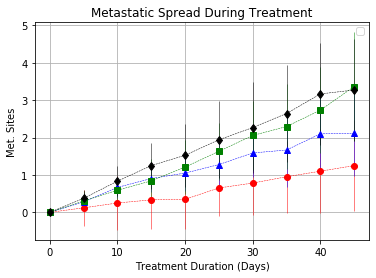

In [9]:
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_format:
    stderr = tumor_stderr[drug]
    met_treatment_plt = plt.errorbar(pivot_met_data.index,pivot_met_data[drug],stderr,
                                       fmt=marker,ls="--",color=colors,linewidth=0.5)
plt.legend(loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()

# Save the Figure
plt.savefig("Metastatic_spread_treatment.png")
# Show the Figure
plt.show()


In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = treatmeant_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame({"Mouse Count": mouse_count}).reset_index()
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse_count = mouse_count_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")
# Preview the Data Frame
pivot_mouse_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


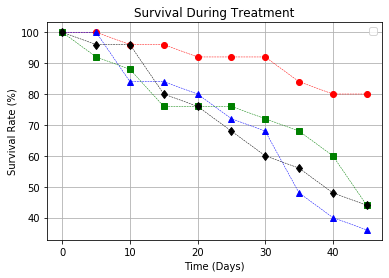

In [14]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_format:
    total_mice = pivot_mouse_count[drug][0]
    survival_rate = (pivot_mouse_count[drug]/total_mice)*100
    survival_treatment_plt = plt.plot(pivot_mouse_count.index,survival_rate,
                                       marker=marker,ls="--",color=colors,linewidth=0.5)
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig("survival_rate.png")
# Show the Figure
plt.show()

In [17]:
# Calculate the percent changes for each drug
perc_change = (pivot_tumor_volume.iloc[-1]/(pivot_tumor_volume.iloc[0])-1)*100
# Display the data to confirm
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

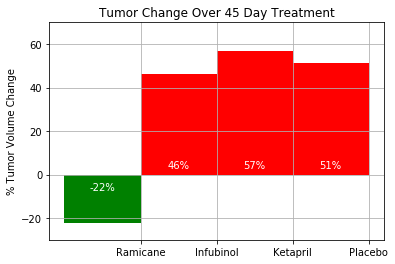

In [22]:
# Store all Relevant Percent Changes into a Tuple
drug_list = ("Ramicane", "Infubinol", "Ketapril", "Placebo")

# Splice the data between passing and failing drugs
passing = perc_change < 0

# Orient widths. Add labels, tick marks, etc. 
change_list = [(perc_change[drug]) for drug in drug_list]
change_plt = plt.bar(drug_list, change_list, width=-1, align="edge", color=passing.map({True: "g", False: "r"}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position, "%d" % int(height)+"%", color="white",
                 ha="center", va="bottom")

# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig("tumor_volume_change.png")

# Show the Figure
plt.show()

In [ ]:
#Observation 1:
    #Ramicane was the most effective treatment, it was 1 of only 2 treatments that saw tumors decrease while all other
    #treatments showed increases in tumor volume.
#Observation 2:
    #All but 1 treatment showed a lower metastatic spread than the Placebo, suggesting that most treatments are 
    #better than doing nothing at all.
#Observation 3:
    #However, the Placebo had a survival rate that was greater than or equal to 4 other treatments, which could mean
    #that despite the metastatic spread, no treatment can still be more beneficial than the wrong treatment. 